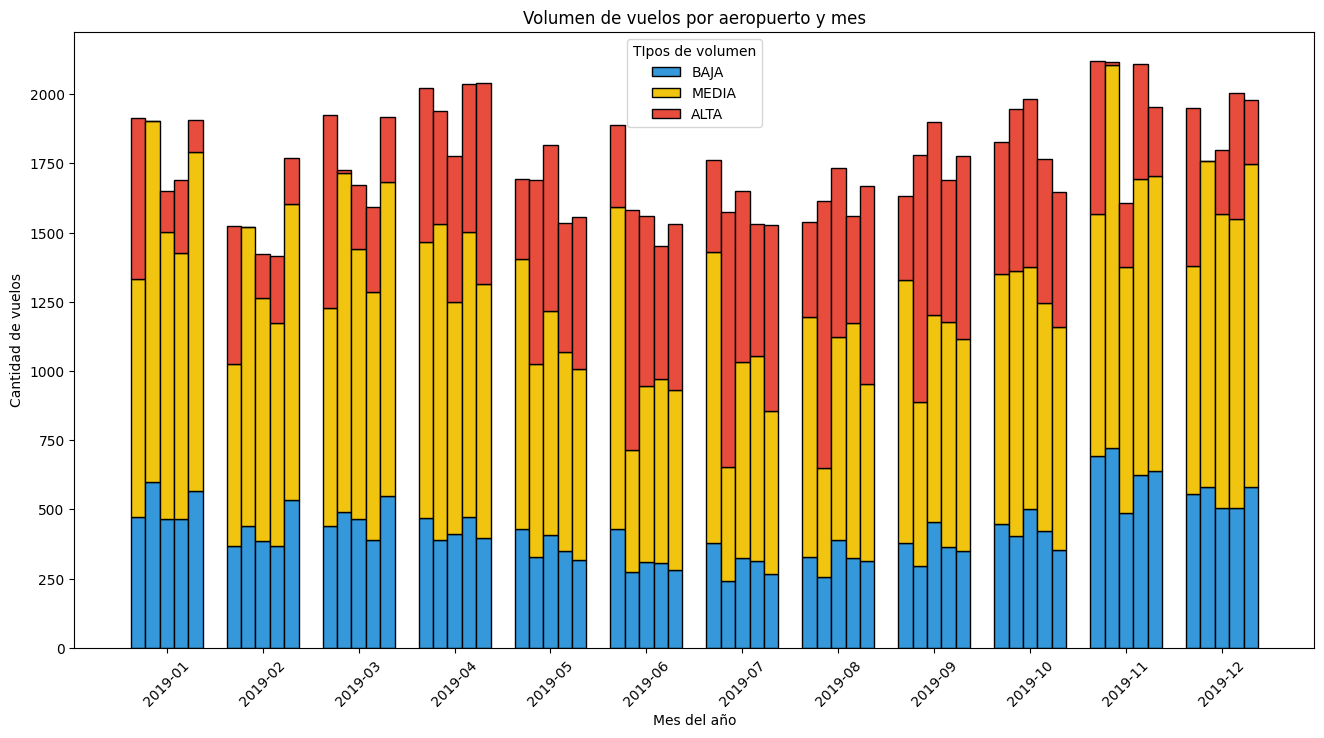

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los archivos y aeropuertos
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

# Configuración de colores por categoría
category_colors = {
    'BAJA': '#3498db',  # Un azul claro, código hexadecimal
    'MEDIA': '#f1c40f',  # Un amarillo, código hexadecimal
    'ALTA': '#e74c3c'   # Un rojo, código hexadecimal
}

# Configuración inicial de la figura y el gráfico
fig, ax = plt.subplots(figsize=(16, 8))

width = 0.15  # Ancho de cada barra

# Almacenar datos de todos los aeropuertos para el mismo mes
all_data = []

# Recorrer los archivos para cargar los datos
for airport_code, file_name in files.items():
    data = pd.read_csv(file_name, low_memory=False)
    data['dateTime'] = pd.to_datetime(data['dateTime'])
    data['year_month'] = data['dateTime'].dt.to_period('M')
    monthly_volume = data.groupby(['year_month', 'volume_group']).size().unstack(fill_value=0).reset_index()
    monthly_volume['year_month'] = monthly_volume['year_month'].astype(str)
    all_data.append(monthly_volume)

# Preparar el índice para cada aeropuerto
num_months = len(all_data[0])
positions = np.arange(num_months)  # Posiciones de los meses

# Dibujar las barras
for idx, airport_data in enumerate(all_data):
    # Desplazar cada conjunto de barras para cada aeropuerto
    x_offsets = positions + (idx * width)
    bottom = np.zeros(num_months)  # Iniciar el fondo de las barras en 0 para cada mes
    for category in ['BAJA', 'MEDIA', 'ALTA']:
        heights = airport_data[category]
        ax.bar(x_offsets, heights, width=width, color=category_colors[category], bottom=bottom,
               edgecolor='black',  # Añadir borde negro
               label=f'{category}' if idx == 0 and positions[0] == idx else "")
        bottom += heights  # Aumentar el fondo para la próxima categoría

# Configuraciones del gráfico
x_labels = all_data[0]['year_month']
ax.set_title('Volumen de vuelos por aeropuerto y mes')
ax.set_xlabel('Mes del año')
ax.set_ylabel('Cantidad de vuelos')
ax.set_xticks(positions + width * (len(files) - 1) / 2)
ax.set_xticklabels(x_labels)
plt.xticks(rotation=45)
plt.legend(title='TIpos de volumen')

plt.show()
